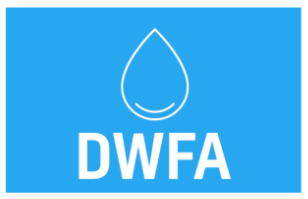

# <center> Préparation des données

## Sommaire:

* [I) Introduction](#chapter1)

    * [Importation des librairies, des données et déclarations des fonctions](#section_1_1)
    
* [II) Préparation des données](#chapter2)
    * [Exploration](#section_2_1)
    * [Jointure](#section_2_2)
    * [Ajout de données calculées](#section_2_3)
    
* [III) Exportation](#chapter3)

## I) Introduction: <a class="anchor" id="chapter1"></a>

L’association Drink Water For All a effectué une demande de financement auprès d’un bailleur de fonds en présentant 3 domaines d’expertise. 

Ces nouveaux financements, s’ils sont accordés par le bailleur, pourront permettre d’investir dans un des domaines d’expertise dans un pays qui n’est pas encore déterminé.

Le but, dans ce cadre, est de réaliser un tableau de bord présentant une vue globale de l’accès à l’eau potable dans le monde. Celui-ci permettra de choisir le pays à cibler dès que le bailleur de fonds aura donné sa réponse sur le domaine d’expertise qu’il souhaite financer.

***

Nous allons dans ce notebook nous concentré sur la préparation des données qui serviront à mettre en place le ou les dashboards, dans le but d'aider au mieux à la prise de décision concernant le pays à choisir.

### Importation des librairies, des données et déclarations des fonctions: <a class="anchor" id="section_1_1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importation des sources de données (toutes issues de la FAO ou de la WHO):
services = pd.read_csv('BasicAndSafelyManagedDrinkingWaterServices.csv')
mortalite = pd.read_csv('MortalityRateAttributedToWater.csv')
politique = pd.read_csv('PoliticalStability.csv')
population = pd.read_csv('Population.csv')
region = pd.read_excel('RegionCountry_.xlsx')

## Préparation des données: <a class="anchor" id="chapter2"></a>

Nous allons ici explorer les données de nos différentes sources afin d'en prendre connaissance et d'effectuer les modifications nécessaires si besoin avant des les joindre dans un fichier final complet.

### Exploration <a class="anchor" id="section_2_1"></a>

> **Population:**

Un fichier contenant les informations de population, selon certains critères, de chaque pays.

In [3]:
population.head()

,Country,Granularity,Year,Population
0,Afghanistan,Total,2000,20779.953
1,Afghanistan,Male,2000,10689.508
2,Afghanistan,Female,2000,10090.449
3,Afghanistan,Rural,2000,15657.474
4,Afghanistan,Urban,2000,4436.282


In [4]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20914 entries, 0 to 20913
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      20914 non-null  object 
 1   Granularity  20914 non-null  object 
 2   Year         20914 non-null  int64  
 3   Population   20914 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 653.7+ KB


In [5]:
population["Granularity"].value_counts()
# certains pays ne semble pas avoir des données complètes

Total     4430
Rural     4414
Urban     4414
Male      3828
Female    3828
Name: Granularity, dtype: int64

In [6]:
# en effet certains pays présente des données partielles: 
cnt_c = population["Country"].value_counts()
cnt_c

# nous ne pouvons cependant pas imputer ces dernières sans fausser nos données

Afghanistan                         95
Mexico                              95
Mongolia                            95
Morocco                             95
Mozambique                          95
                                    ..
Serbia and Montenegro               30
Bonaire, Sint Eustatius and Saba    24
Sint Maarten  (Dutch part)          24
Saint-Martin (French part)           8
Saint Barthélemy                     8
Name: Country, Length: 239, dtype: int64

In [7]:
# étudions rapidement la liste des pays constituant nos données:
population["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)',
       'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'China, mainland', 'China, Taiwan Province of', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       "Democratic People's Republic

On constate que la Chine est doublement représentée. Dans son ensemble mais aussi avec la distinction d'états aux statuts particuliers comme Hong-Kong ou Macao.

Pour garder le plus d'information possible on choisit de se séparer des lignes "China" et de conserver les lignes plus "précises".

In [8]:
population = population[population["Country"] != "China"]
population.shape

(20819, 4)

In [9]:
# on ne souhaite plus que la population soit exprimée en "1000 personnes":
population["Population"] = population["Population"]*1000

In [10]:
# on peut compter le nombre de pays que contient notre fichier: 
population["Country"].nunique()

238

> **Services:**

Un fichier qui détail la part de la population ayant accès à des services "basiques" ou "développés" d'eau potable.

In [11]:
services.head()

,Year,Country,Granularity,Population using at least basic drinking-water services (%),Population using safely managed drinking-water services (%)
0,2000,Afghanistan,Rural,21.61913,NaN
1,2000,Afghanistan,Total,27.77190,NaN
2,2000,Afghanistan,Urban,49.48745,NaN
3,2000,Albania,Rural,81.78472,NaN
4,2000,Albania,Total,87.86662,49.29324


In [12]:
services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 5 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Year                                                         10476 non-null  int64  
 1   Country                                                      10476 non-null  object 
 2   Granularity                                                  10476 non-null  object 
 3   Population using at least basic drinking-water services (%)  9415 non-null   float64
 4   Population using safely managed drinking-water services (%)  3286 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 409.3+ KB


In [13]:
services["Granularity"].unique()

array(['Rural', 'Total', 'Urban'], dtype=object)

In [14]:
# étudions rapidement la liste des pays constituant nos données:
services["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia

Ces donneés étant issues de la WHO, la nomenclature est différente et certains pays on un nom légèrement différent.

On comparant à la liste du fichier précédent (issu de la FAO), nous allons procéder à quelques corrections afin de faciliter la jointure plus tard et s'assurer de la justesse de nos données.

In [15]:
#correction "China" -> "China, mainland":
services['Country'] = np.where(services['Country'] == 'China', 'China, mainland', services['Country'])

#correction "Rep. of N.M." -> "North Macedonia":
services['Country'] = np.where(services['Country'] == 'Republic of North Macedonia', 'North Macedonia', services['Country'])

#correction "Serbia" 2000-2005 -> "Serbia and Montenegro" (Montenegro = pas de données):
services['Country'] = np.where((services['Country'] == 'Serbia') &
                               (services["Year"] < 2006),
                               'Serbia and Montenegro', services['Country'])
#correction "Sudan (former)" 2000-2011 -> "Sudan" + "South Sudan" 2012-...
services['Country'] = np.where((services['Country'] == 'Sudan') &
                               (services["Year"] < 2012),
                               'Sudan (former)', services['Country'])

services.shape

(10476, 5)

In [16]:
# on peut compter le nombre de pays que contient notre fichier: 
services["Country"].nunique()

196

> **Mortalité:**

Un fichier contenant le taux de mortalité lié à l'utilisation de services d'eau potable inadaptés ainsi que le nombre de morts.

Remarque: 
- Contrairement aux autres fichiers nous n'avons ces informations que pour l'année 2016.

In [17]:
mortalite.head()

,Year,Country,Granularity,Mortality rate attributed to exposure to unsafe WASH services,WASH deaths
0,2016,Afghanistan,Female,15.31193,NaN
1,2016,Afghanistan,Male,12.61297,NaN
2,2016,Afghanistan,Total,13.92067,4824.353
3,2016,Albania,Female,0.12552,NaN
4,2016,Albania,Male,0.20650,NaN


In [18]:
mortalite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 5 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Year                                                           549 non-null    int64  
 1   Country                                                        549 non-null    object 
 2   Granularity                                                    549 non-null    object 
 3   Mortality rate attributed to exposure to unsafe WASH services  549 non-null    float64
 4   WASH deaths                                                    183 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 21.6+ KB


In [19]:
mortalite["Granularity"].unique()

array(['Female', 'Male', 'Total'], dtype=object)

On peut appliquer sur ce fichier les mêmes modifications que sur le précédent puisque il est aussi issu de la WHO.

In [20]:
#correction "China" -> "China, mainland"
mortalite['Country'] = np.where(mortalite['Country'] == 'China', 'China, mainland', mortalite['Country'])

#correction "Rep. of N.M." -> "North Macedonia"
mortalite['Country'] = np.where(mortalite['Country'] == 'Republic of North Macedonia', 'North Macedonia', mortalite['Country'])

mortalite.shape

(549, 5)

In [21]:
# on peut compter le nombre de pays que contient notre fichier: 
mortalite["Country"].nunique()

183

> **Politique:**

Ce fichier contient l'index de stabilité politique de chaque pays. Celui-ci reflète différents facteurs comme la probabilité de conflits armés, de manifestations violentes, de troubles sociaux, d'actes de terrorisme, entre autres.

In [22]:
politique.head()

,Country,Year,Political_Stability,Granularity
0,Afghanistan,2000,-2.44,Total
1,Afghanistan,2002,-2.04,Total
2,Afghanistan,2003,-2.20,Total
3,Afghanistan,2004,-2.30,Total
4,Afghanistan,2005,-2.07,Total


In [23]:
politique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3526 entries, 0 to 3525
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              3526 non-null   object 
 1   Year                 3526 non-null   int64  
 2   Political_Stability  3526 non-null   float64
 3   Granularity          3526 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 110.3+ KB


In [24]:
#correction "Serbia" 2000-2005 -> "Serbia and Montenegro" (Montenegro = pas de données)
politique['Country'] = np.where((politique['Country'] == 'Serbia') &
                               (politique["Year"] < 2006),
                               'Serbia and Montenegro', politique['Country'])

#correction "Sudan (former)" 2000-2011 -> "Sudan" + "South Sudan" 2012-...
politique['Country'] = np.where((politique['Country'] == 'Sudan') &
                               (politique["Year"] < 2012),
                               'Sudan (former)', politique['Country'])

In [25]:
# on peut compter le nombre de pays que contient notre fichier: 
politique["Country"].nunique()

202

> **Région:**

Ce fichier associe chaque pays à une "région" selon la nomenclature de la WHO.

Remarque:
- Un travail préalable a été réalisé sur ces données afin d'obtenir les informations pour l'entiereté des pays, le fichier initial étant incomplet.

In [26]:
region.head()

,REGION (DISPLAY),COUNTRY (DISPLAY)
0,Europe,Albania
1,Europe,Andorra
2,Europe,Armenia
3,Western Pacific,Australia
4,Europe,Austria


In [27]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   REGION (DISPLAY)   238 non-null    object
 1   COUNTRY (DISPLAY)  238 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


In [28]:
#correction "Rep. of N.M." -> "North Macedonia"
region['COUNTRY (DISPLAY)'] = np.where(region['COUNTRY (DISPLAY)'] == 'Republic of North Macedonia', 'North Macedonia', region['COUNTRY (DISPLAY)'])

In [29]:
#on se sépare des lignes "China" qui font doublons avec les infos "China, HK/Macao/..."
region = region[region["COUNTRY (DISPLAY)"] != "China"]

### Jointure <a class="anchor" id="section_2_2"></a>

Maintenant que nos fichiers ont été préparés, nous alons pouvoir les joindre en un seul fichier complet qui nous servira pour la création denos visuels.

> **Création des clés:**

Pour créer les clés qui nous serviront lors des jointures on "merge" plusieurs variables ensmble afin de créer une clé unique à chaque ligne.

In [30]:
# on doit d'abord changer le type de nos variables "Year":
population["Year"] = population["Year"].astype(str)
services["Year"] = services["Year"].astype(str)
mortalite["Year"] = mortalite["Year"].astype(str)
politique["Year"] = politique["Year"].astype(str)

In [31]:
# on crée les clés dans chaque df à travers une nouvelle variable "Key":
population["Key"] = population["Country"] + population["Granularity"] + population["Year"]
services["Key"] = services["Country"] + services["Granularity"] + services["Year"]
mortalite["Key"] = mortalite["Country"] + mortalite["Granularity"] + mortalite["Year"]
politique["Key"] = politique["Country"] + politique["Granularity"] + politique["Year"]

> **Jointures:**

In [32]:
# Nous nous sommes rendu compte durant notre exploration que les fichiers comptaient souvent un nombre différents de pays. Nous souhaitons garder un maximum d'information, cependant n'avoir comme information pour un pays que le nombre d'habitant n'aidera pas à la prise de décision concernant notre problèmatique.
# Ainsi on choisi d'utiliser le fichier "services" comme fichier de "référence" puisque ce sont les informations contenues dans ce fichier qui sont le plus pertinentes. De plus l'impact des pays éliminés lors de cette opération est négligeable pour notre étude.

In [33]:
merge_1 = population.merge(services, on="Key", how="outer")
merge_1

,Country_x,Granularity_x,Year_x,Population,Key,Year_y,Country_y,Granularity_y,Population using at least basic drinking-water services (%),Population using safely managed drinking-water services (%)
0,Afghanistan,Total,2000,20779953.0,AfghanistanTotal2000,2000,Afghanistan,Total,27.77190,NaN
1,Afghanistan,Male,2000,10689508.0,AfghanistanMale2000,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Female,2000,10090449.0,AfghanistanFemale2000,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Rural,2000,15657474.0,AfghanistanRural2000,2000,Afghanistan,Rural,21.61913,NaN
4,Afghanistan,Urban,2000,4436282.0,AfghanistanUrban2000,2000,Afghanistan,Urban,49.48745,NaN
...,...,...,...,...,...,...,...,...,...,...
20868,NaN,NaN,NaN,NaN,South SudanTotal2010,2010,South Sudan,Total,NaN,NaN
20869,NaN,NaN,NaN,NaN,South SudanUrban2010,2010,South Sudan,Urban,NaN,NaN
20870,NaN,NaN,NaN,NaN,South SudanRural2011,2011,South Sudan,Rural,38.68334,NaN
20871,NaN,NaN,NaN,NaN,South SudanTotal2011,2011,South Sudan,Total,41.08644,NaN


In [34]:
# on drop les colonnes en doubles:
merge_1 = merge_1.drop(columns=["Year_y", "Country_y", "Granularity_y"])

In [35]:
merge_2 = merge_1.merge(mortalite, on="Key", how="outer")
merge_2.head()

,Country_x,Granularity_x,Year_x,Population,Key,Population using at least basic drinking-water services (%),Population using safely managed drinking-water services (%),Year,Country,Granularity,Mortality rate attributed to exposure to unsafe WASH services,WASH deaths
0,Afghanistan,Total,2000,20779953.0,AfghanistanTotal2000,27.77190,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Male,2000,10689508.0,AfghanistanMale2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Female,2000,10090449.0,AfghanistanFemale2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Rural,2000,15657474.0,AfghanistanRural2000,21.61913,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Urban,2000,4436282.0,AfghanistanUrban2000,49.48745,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# on drop les colonnes en doubles:
merge_2 = merge_2.drop(columns=["Year", "Country", "Granularity"])

In [37]:
merge_3 = merge_2.merge(politique, on="Key", how="outer")
merge_3.head()

,Country_x,Granularity_x,Year_x,Population,Key,Population using at least basic drinking-water services (%),Population using safely managed drinking-water services (%),Mortality rate attributed to exposure to unsafe WASH services,WASH deaths,Country,Year,Political_Stability,Granularity
0,Afghanistan,Total,2000,20779953.0,AfghanistanTotal2000,27.77190,NaN,NaN,NaN,Afghanistan,2000,-2.44,Total
1,Afghanistan,Male,2000,10689508.0,AfghanistanMale2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Female,2000,10090449.0,AfghanistanFemale2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Rural,2000,15657474.0,AfghanistanRural2000,21.61913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Urban,2000,4436282.0,AfghanistanUrban2000,49.48745,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# on drop les colonnes en doubles:
merge_3 = merge_3.drop(columns=["Year", "Country", "Granularity"])

In [39]:
merge_4 = merge_3.merge(region, left_on="Country_x", right_on="COUNTRY (DISPLAY)", how="outer")
merge_4.head()

,Country_x,Granularity_x,Year_x,Population,Key,Population using at least basic drinking-water services (%),Population using safely managed drinking-water services (%),Mortality rate attributed to exposure to unsafe WASH services,WASH deaths,Political_Stability,REGION (DISPLAY),COUNTRY (DISPLAY)
0,Afghanistan,Total,2000,20779953.0,AfghanistanTotal2000,27.77190,NaN,NaN,NaN,-2.44,Eastern Mediterranean,Afghanistan
1,Afghanistan,Male,2000,10689508.0,AfghanistanMale2000,NaN,NaN,NaN,NaN,NaN,Eastern Mediterranean,Afghanistan
2,Afghanistan,Female,2000,10090449.0,AfghanistanFemale2000,NaN,NaN,NaN,NaN,NaN,Eastern Mediterranean,Afghanistan
3,Afghanistan,Rural,2000,15657474.0,AfghanistanRural2000,21.61913,NaN,NaN,NaN,NaN,Eastern Mediterranean,Afghanistan
4,Afghanistan,Urban,2000,4436282.0,AfghanistanUrban2000,49.48745,NaN,NaN,NaN,NaN,Eastern Mediterranean,Afghanistan


In [40]:
# on drop les colonnes en doubles:
merge_4 = merge_4.drop(columns=["COUNTRY (DISPLAY)"])

In [41]:
merge_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20873 entries, 0 to 20872
Data columns (total 11 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Country_x                                                      20819 non-null  object 
 1   Granularity_x                                                  20819 non-null  object 
 2   Year_x                                                         20819 non-null  object 
 3   Population                                                     20819 non-null  float64
 4   Key                                                            20873 non-null  object 
 5   Population using at least basic drinking-water services (%)    9415 non-null   float64
 6   Population using safely managed drinking-water services (%)    3286 non-null   float64
 7   Mortality rate attributed to exposure to unsafe WASH servi

In [42]:
# on souhaite supprimer les données non-associées à un pays:
# (il s'agit en fait des données qui concernent le Monténégro et le Soudan du Sud) 
na_c = merge_4[merge_4["Country_x"].isna()]
na_c["Key"].unique()

array(['MontenegroRural2000', 'MontenegroTotal2000',
       'MontenegroUrban2000', 'South SudanRural2000',
       'South SudanTotal2000', 'South SudanUrban2000',
       'MontenegroRural2001', 'MontenegroTotal2001',
       'MontenegroUrban2001', 'South SudanRural2001',
       'South SudanTotal2001', 'South SudanUrban2001',
       'MontenegroRural2002', 'MontenegroTotal2002',
       'MontenegroUrban2002', 'South SudanRural2002',
       'South SudanTotal2002', 'South SudanUrban2002',
       'MontenegroRural2003', 'MontenegroTotal2003',
       'MontenegroUrban2003', 'South SudanRural2003',
       'South SudanTotal2003', 'South SudanUrban2003',
       'MontenegroRural2004', 'MontenegroTotal2004',
       'MontenegroUrban2004', 'South SudanRural2004',
       'South SudanTotal2004', 'South SudanUrban2004',
       'MontenegroRural2005', 'MontenegroTotal2005',
       'MontenegroUrban2005', 'South SudanRural2005',
       'South SudanTotal2005', 'South SudanUrban2005',
       'South SudanRural2006

In [43]:
# on souhaite supprimer les données non-associées à une région:
# (il s'agit en fait des données qui concernent le Groenland, le Monténégro et le Soudan du Sud) 
na_r = merge_4[merge_4["REGION (DISPLAY)"].isna()]
na_r["Key"].unique()

array(['GreenlandTotal2000', 'GreenlandRural2000', 'GreenlandUrban2000',
       'GreenlandTotal2001', 'GreenlandRural2001', 'GreenlandUrban2001',
       'GreenlandTotal2002', 'GreenlandRural2002', 'GreenlandUrban2002',
       'GreenlandTotal2003', 'GreenlandRural2003', 'GreenlandUrban2003',
       'GreenlandTotal2004', 'GreenlandRural2004', 'GreenlandUrban2004',
       'GreenlandTotal2005', 'GreenlandRural2005', 'GreenlandUrban2005',
       'GreenlandTotal2006', 'GreenlandRural2006', 'GreenlandUrban2006',
       'GreenlandTotal2007', 'GreenlandRural2007', 'GreenlandUrban2007',
       'GreenlandTotal2008', 'GreenlandRural2008', 'GreenlandUrban2008',
       'GreenlandTotal2009', 'GreenlandRural2009', 'GreenlandUrban2009',
       'GreenlandTotal2010', 'GreenlandRural2010', 'GreenlandUrban2010',
       'GreenlandTotal2011', 'GreenlandRural2011', 'GreenlandUrban2011',
       'GreenlandTotal2012', 'GreenlandRural2012', 'GreenlandUrban2012',
       'GreenlandTotal2013', 'GreenlandRural2013', 

In [44]:
data = merge_4[~merge_4["REGION (DISPLAY)"].isna()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20762 entries, 0 to 20818
Data columns (total 11 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Country_x                                                      20762 non-null  object 
 1   Granularity_x                                                  20762 non-null  object 
 2   Year_x                                                         20762 non-null  object 
 3   Population                                                     20762 non-null  float64
 4   Key                                                            20762 non-null  object 
 5   Population using at least basic drinking-water services (%)    9412 non-null   float64
 6   Population using safely managed drinking-water services (%)    3286 non-null   float64
 7   Mortality rate attributed to exposure to unsafe WASH servi

### Ajout de données calculées <a class="anchor" id="section_2_3"></a>

On souhaite maintenant ajoutées quelques données calculées:
- l'accès aux services basiques/développées en nombre de personnes
- le nombre et la part de personnes n'ayant pas au moins accès à un services basiques
- la part de la population urbaine & rurale

> **Accès aux services:**

In [45]:
data["Accès aux services basiques (population)"] = (data["Population"]*data["Population using at least basic drinking-water services (%)"])/100
data["Accès aux services développés (population)"] = (data["Population"]*data["Population using safely managed drinking-water services (%)"])/100
data.head()

C:\Users\MSI\AppData\Local\Temp\ipykernel_19224\1754567167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Accès aux services basiques (population)"] = (data["Population"]*data["Population using at least basic drinking-water services (%)"])/100
C:\Users\MSI\AppData\Local\Temp\ipykernel_19224\1754567167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Accès aux services développés (population)"] = (data["Population"]*data["Population using safely managed drinking-water services (%)"])/100


,Country_x,Granularity_x,Year_x,Population,Key,Population using at least basic drinking-water services (%),Population using safely managed drinking-water services (%),Mortality rate attributed to exposure to unsafe WASH services,WASH deaths,Political_Stability,REGION (DISPLAY),Accès aux services basiques (population),Accès aux services développés (population)
0,Afghanistan,Total,2000,20779953.0,AfghanistanTotal2000,27.77190,NaN,NaN,NaN,-2.44,Eastern Mediterranean,5.770988e+06,NaN
1,Afghanistan,Male,2000,10689508.0,AfghanistanMale2000,NaN,NaN,NaN,NaN,NaN,Eastern Mediterranean,NaN,NaN
2,Afghanistan,Female,2000,10090449.0,AfghanistanFemale2000,NaN,NaN,NaN,NaN,NaN,Eastern Mediterranean,NaN,NaN
3,Afghanistan,Rural,2000,15657474.0,AfghanistanRural2000,21.61913,NaN,NaN,NaN,NaN,Eastern Mediterranean,3.385010e+06,NaN
4,Afghanistan,Urban,2000,4436282.0,AfghanistanUrban2000,49.48745,NaN,NaN,NaN,NaN,Eastern Mediterranean,2.195403e+06,NaN


> **Population sans accès**

In [46]:
data["Population sans accès (%)"] = 100-data["Population using at least basic drinking-water services (%)"]
data["Population sans accès"] = (data["Population"]*data["Population sans accès (%)"])/100

C:\Users\MSI\AppData\Local\Temp\ipykernel_19224\1144623596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Population sans accès (%)"] = 100-data["Population using at least basic drinking-water services (%)"]
C:\Users\MSI\AppData\Local\Temp\ipykernel_19224\1144623596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Population sans accès"] = (data["Population"]*data["Population sans accès (%)"])/100


> **Population urbaine/rurale:**

In [47]:
population["cross_key"] = population["Country"] + "Total" + population["Year"]

In [48]:
pop_cross = population.pivot(index='cross_key', columns='Granularity', values='Population')
pop_cross

Granularity,Female,Male,Rural,Total,Urban
cross_key,,,,,
AfghanistanTotal2000,10090449.0,10689508.0,15657474.0,20779953.0,4436282.0
AfghanistanTotal2001,10489238.0,11117754.0,16318324.0,21606988.0,4648139.0
AfghanistanTotal2002,10958668.0,11642106.0,17086910.0,22600770.0,4893013.0
AfghanistanTotal2003,11466237.0,12214634.0,17909063.0,23680871.0,5155788.0
AfghanistanTotal2004,11962963.0,12763726.0,18692107.0,24726684.0,5426872.0
...,...,...,...,...,...
ZimbabweTotal2014,7126795.0,6459915.0,10402274.0,13586707.0,5009401.0
ZimbabweTotal2015,7245864.0,6568778.0,10667966.0,13814629.0,5109485.0
ZimbabweTotal2016,7356132.0,6674206.0,10934468.0,14030331.0,5215894.0


In [49]:
pop_cross["Population urbaine (%)"] = (pop_cross["Urban"]*100)/pop_cross["Total"]
pop_cross["Population rurale (%)"] = (pop_cross["Rural"]*100)/pop_cross["Total"]
pop_cross.head()

Granularity,Female,Male,Rural,Total,Urban,Population urbaine (%),Population rurale (%)
cross_key,,,,,,,
AfghanistanTotal2000,10090449.0,10689508.0,15657474.0,20779953.0,4436282.0,21.348855,75.348938
AfghanistanTotal2001,10489238.0,11117754.0,16318324.0,21606988.0,4648139.0,21.512202,75.523363
AfghanistanTotal2002,10958668.0,11642106.0,17086910.0,22600770.0,4893013.0,21.649762,75.603221
AfghanistanTotal2003,11466237.0,12214634.0,17909063.0,23680871.0,5155788.0,21.771953,75.626707
AfghanistanTotal2004,11962963.0,12763726.0,18692107.0,24726684.0,5426872.0,21.947431,75.594880


In [50]:
data = data.merge(pop_cross, left_on="Key", right_on="cross_key", how='left')
data.head()

,Country_x,Granularity_x,Year_x,Population,Key,Population using at least basic drinking-water services (%),Population using safely managed drinking-water services (%),Mortality rate attributed to exposure to unsafe WASH services,WASH deaths,Political_Stability,...,Accès aux services développés (population),Population sans accès (%),Population sans accès,Female,Male,Rural,Total,Urban,Population urbaine (%),Population rurale (%)
0,Afghanistan,Total,2000,20779953.0,AfghanistanTotal2000,27.77190,NaN,NaN,NaN,-2.44,...,NaN,72.22810,1.500897e+07,10090449.0,10689508.0,15657474.0,20779953.0,4436282.0,21.348855,75.348938
1,Afghanistan,Male,2000,10689508.0,AfghanistanMale2000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Female,2000,10090449.0,AfghanistanFemale2000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Rural,2000,15657474.0,AfghanistanRural2000,21.61913,NaN,NaN,NaN,NaN,...,NaN,78.38087,1.227246e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Urban,2000,4436282.0,AfghanistanUrban2000,49.48745,NaN,NaN,NaN,NaN,...,NaN,50.51255,2.240879e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
data = data.drop(columns=["Female","Male","Rural","Urban", "Total"])

## III) Exportation: <a class="anchor" id="chapter3"></a>

> **Harmonisation du nom variables:**

In [52]:
data = data.drop(columns=["Key"])
data = data.rename(columns={'Country_x': 'Pays', 'Granularity_x': 'Granularité', 'Year_x': 'Année',
                            'Population using at least basic drinking-water services (%)': "Accès aux services basiques (%)",
                            'Population using safely managed drinking-water services (%)': "Accès aux services développés (%)",
                            'Mortality rate attributed to exposure to unsafe WASH services': "Taux de mortalité (services inadaptés)",
                            'WASH deaths': 'Morts (services inadaptés)', 'Political_Stability': 'Stabilité politique',
                            'REGION (DISPLAY)': 'Région (WHO)'})
data.head()

,Pays,Granularité,Année,Population,Accès aux services basiques (%),Accès aux services développés (%),Taux de mortalité (services inadaptés),Morts (services inadaptés),Stabilité politique,Région (WHO),Accès aux services basiques (population),Accès aux services développés (population),Population sans accès (%),Population sans accès,Population urbaine (%),Population rurale (%)
0,Afghanistan,Total,2000,20779953.0,27.77190,NaN,NaN,NaN,-2.44,Eastern Mediterranean,5.770988e+06,NaN,72.22810,1.500897e+07,21.348855,75.348938
1,Afghanistan,Male,2000,10689508.0,NaN,NaN,NaN,NaN,NaN,Eastern Mediterranean,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Female,2000,10090449.0,NaN,NaN,NaN,NaN,NaN,Eastern Mediterranean,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Rural,2000,15657474.0,21.61913,NaN,NaN,NaN,NaN,Eastern Mediterranean,3.385010e+06,NaN,78.38087,1.227246e+07,NaN,NaN
4,Afghanistan,Urban,2000,4436282.0,49.48745,NaN,NaN,NaN,NaN,Eastern Mediterranean,2.195403e+06,NaN,50.51255,2.240879e+06,NaN,NaN


In [53]:
# modification pour faciliter visualisation: "China" -> "China, mainland" & "China, Taiwan Province of" -> "Taiwan"
data['Pays'] = np.where(data['Pays'] == 'China, mainland', 'China', data['Pays'])
data['Pays'] = np.where(data['Pays'] == 'China, Taiwan Province of', 'Taiwan', data['Pays'])

> **Export:**

In [54]:
data.to_csv(r'C:\Users\MSI\P8_OpenClassrooms\data_DWFA.csv', index = False)